In [21]:
import sys
sys.path.insert(1, "../")
import matplotlib.pyplot as plt
import numpy as np
from ghost_unfairness.utils import *

In [73]:
from scipy.stats import norm
def pprs(delta_mu_c, delta_mu_a, sigma_p, sigma_u, mu_p_pos, x, alpha=0.5):
    
    mu_p_neg = mu_p_pos - 2 * delta_mu_c
    mu_u_pos = mu_p_pos - 2 * delta_mu_a
    mu_u_neg = mu_u_pos - 2 * delta_mu_c
    
    print('\t'.join(['MU_P_POS', 'MU_P_NEG', 'MU_U_POS', 'MU_U_NEG']))
    print(mu_p_pos, mu_p_neg, mu_u_pos, mu_u_neg, sep='\t')
    
    rv_p_pos = norm(loc=mu_p_pos, scale=sigma_p)
    rv_p_neg = norm(loc=mu_p_neg, scale=sigma_p)
    
    rv_u_pos = norm(loc=mu_u_pos, scale=sigma_u)
    rv_u_neg = norm(loc=mu_u_neg, scale=sigma_u)
    
    ppr_p_pos = 1 - rv_p_pos.cdf(x)
    ppr_p_neg = 1 - rv_p_neg.cdf(x)
    ppr_u_pos = 1 - rv_u_pos.cdf(x)
    ppr_u_neg = 1 - rv_u_neg.cdf(x)
    
    ppr_list = [alpha * ppr_p_pos, (1 - alpha) * ppr_p_neg, alpha * ppr_u_pos, (1 - alpha) * ppr_u_neg]
    print('\t'.join(['PPR_P_POS', 'PPR_P_NEG', 'PPR_U_POS', 'PPR_U_NEG']))
    print('\t'.join(['{:7f}'.format(i) for i in ppr_list]))
    
    print('\t\t'.join(['ACC_P', 'ACC_U']))
    print('\t'.join(['{:7f}'.format(ppr_list[i]) for i in range(0, len(ppr_list), 2)]))
        
pprs(50, 75, 100, 50, 600, 400)

MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	500	450	350
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.488625	0.420672	0.420672	0.079328
ACC_P		ACC_U
0.488625	0.420672


### Insight
1. If between group separation is high, it is difficult to pick a optimal classifier with good fairness criteria if the group-wise variances are low.
2. Within group seperation mostly contributes to accuracy. On the other hand, between group separation has influence on fairness metric.

The following example shows when the optimal classifier is worse than the group-wise classifier.

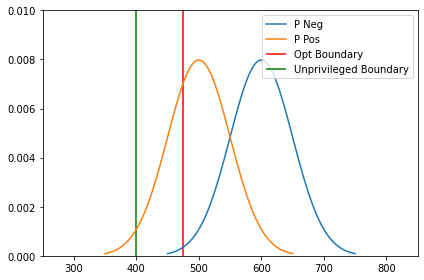

In [104]:
plot_normal(600, 50, label='P Neg')
plot_normal(500, 50, label='P Pos')
plt.vlines(475, 0, 0.2, color='red', label = 'Opt Boundary')
plt.vlines(400, 0, 0.2, color='green', label = 'Unprivileged Boundary')
plt.xlim(250, 850)
plt.ylim(0, 0.01)
plt.legend()
plt.tight_layout()

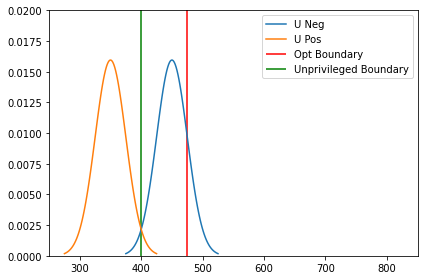

In [107]:
plot_normal(450, 25, label='U Neg')
plot_normal(350, 25, label='U Pos')
plt.vlines(475, 0, 0.2, color='red', label = 'Opt Boundary')
plt.vlines(400, 0, 0.2, color='green', label = 'Unprivileged Boundary')
plt.xlim(250, 850)
plt.ylim(0, 0.02)
plt.legend()
plt.tight_layout()

#### Why?
Because as we move from group-wise to optimal classifier, we give up more positive predictions in unprivileged group than in the privileged group. Since, the variance in unprivileged group is small, moving the classifier boundary same amount covers more area in unprivileged group than the privileged group.

In [102]:
# Within group separation.
delta_c = 50
# Between group sepration.
delta_a = 75
sigma_p = 50
sigma_u = 25

In [103]:
report(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, verbose=False)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=400)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=475)

DI(theta_u)
0.5057610746317145
DI(theta)
0.09414346676325117
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	500	450	350
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.499984	0.488625	0.488625	0.011375
ACC_P		ACC_U
0.499984	0.488625
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	500	450	350
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.496895	0.345731	0.079328	0.000000
ACC_P		ACC_U
0.496895	0.079328


The following example shows when the optimal classifier is better than the group-wise classifier.

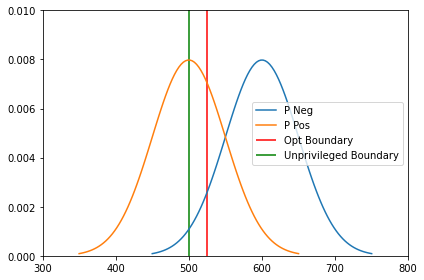

In [126]:
plot_normal(600, 50, label='P Neg')
plot_normal(500, 50, label='P Pos')
plt.vlines(525, 0, 0.2, color='red', label = 'Opt Boundary')
plt.vlines(500, 0, 0.2, color='green', label = 'Unprivileged Boundary')
plt.xlim(300, 800)
plt.ylim(0, 0.01)
plt.legend()
plt.tight_layout()

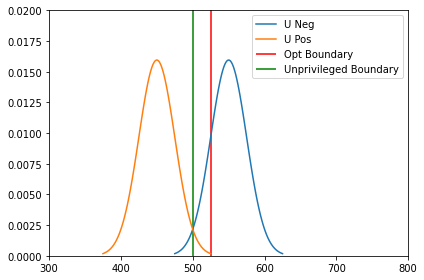

In [127]:
plot_normal(550, 25, label='U Neg')
plot_normal(450, 25, label='U Pos')
plt.vlines(525, 0, 0.2, color='red', label = 'Opt Boundary')
plt.vlines(500, 0, 0.2, color='green', label = 'Unprivileged Boundary')
plt.xlim(300, 800)
plt.ylim(0, 0.02)
plt.legend()
plt.tight_layout()

#### Why?
Because as we move from group-wise to optimal classifier, we decrease positive predictions in unprivileged group at a lower rate than in the privileged group.

In [129]:
# Within group separation.
delta_c = 50
# Between group sepration.
delta_a = 25
sigma_p = 50
sigma_u = 25

In [130]:
report(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, verbose=False)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=500)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=525)

DI(theta_u)
0.6769335517482821
DI(theta)
0.678645450368782
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	500	550	450
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.488625	0.250000	0.488625	0.011375
ACC_P		ACC_U
0.488625	0.488625
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	500	550	450
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.466596	0.154269	0.420672	0.000675
ACC_P		ACC_U
0.466596	0.420672


In [144]:
# Within group separation.
delta_c = 50
# Between group sepration.
delta_a = 75
sigma_p = 50
sigma_u = 25
report(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, verbose=False)
temp = [[di_theta(delta_c, delta_a, sigma_p=i, sigma_u=j)
    for j in range(25, 200, 25)]
 for i in range(25, 200, 25)
]
for t in temp:
    print('\t'.join(['{:2f}'.format(i) for i in t]))
    
print()

temp = [[di_theta_u(delta_c, delta_a, sigma_p=i, sigma_u=j)
    for j in range(25, 200, 25)]
 for i in range(25, 200, 25)
]
for t in temp:
    print('\t'.join(['{:2f}'.format(i) for i in t]))


DI(theta_u)
0.5057610746317145
DI(theta)
0.09414346676325117
0.086163	0.170933	0.226591	0.275312	0.314659	0.345478	0.369690
0.094143	0.186766	0.247578	0.300812	0.343803	0.377477	0.403932
0.100239	0.198859	0.263609	0.320289	0.366065	0.401919	0.430086
0.106262	0.210807	0.279448	0.339534	0.388060	0.426069	0.455928
0.111682	0.221559	0.293700	0.356851	0.407851	0.447799	0.479181
0.116329	0.230778	0.305921	0.371699	0.424822	0.466431	0.499119
0.120260	0.238576	0.316259	0.384260	0.439178	0.482193	0.515986

0.500008	0.500008	0.500008	0.500008	0.500008	0.500008	0.500008
0.505761	0.505761	0.505761	0.505761	0.505761	0.505761	0.505761
0.524946	0.524946	0.524946	0.524946	0.524946	0.524946	0.524946
0.549875	0.549875	0.549875	0.549875	0.549875	0.549875	0.549875
0.576919	0.576919	0.576919	0.576919	0.576919	0.576919	0.576919
0.603757	0.603757	0.603757	0.603757	0.603757	0.603757	0.603757
0.629090	0.629090	0.629090	0.629090	0.629090	0.629090	0.629090


In [146]:
# Within group separation.
delta_c = 50
# Between group sepration.
delta_a = 25
sigma_p = 50
sigma_u = 25
report(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, verbose=False)
temp = [[di_theta(delta_c, delta_a, sigma_p=i, sigma_u=j)
    for j in range(25, 200, 25)]
 for i in range(25, 200, 25)
]
for t in temp:
    print('\t'.join(['{:2f}'.format(i) for i in t]))
    
print()

temp = [[di_theta_u(delta_c, delta_a, sigma_p=i, sigma_u=j)
    for j in range(25, 200, 25)]
 for i in range(25, 200, 25)
]
for t in temp:
    print('\t'.join(['{:2f}'.format(i) for i in t]))


DI(theta_u)
0.6769335517482821
DI(theta)
0.678645450368782
0.728152	0.655203	0.681941	0.713151	0.737500	0.755826	0.769819
0.678645	0.610656	0.635576	0.664664	0.687358	0.704437	0.717480
0.695990	0.626262	0.651819	0.681651	0.704925	0.722441	0.735816
0.717391	0.645519	0.671862	0.702611	0.726600	0.744655	0.758442
0.735023	0.661385	0.688376	0.719880	0.744459	0.762958	0.777083
0.748876	0.673851	0.701350	0.733448	0.758490	0.777338	0.791729
0.759811	0.683690	0.711591	0.744158	0.769566	0.788688	0.803290

0.666681	0.666681	0.666681	0.666681	0.666681	0.666681	0.666681
0.676934	0.676934	0.676934	0.676934	0.676934	0.676934	0.676934
0.709830	0.709830	0.709830	0.709830	0.709830	0.709830	0.709830
0.745520	0.745520	0.745520	0.745520	0.745520	0.745520	0.745520
0.776310	0.776310	0.776310	0.776310	0.776310	0.776310	0.776310
0.801598	0.801598	0.801598	0.801598	0.801598	0.801598	0.801598
0.822270	0.822270	0.822270	0.822270	0.822270	0.822270	0.822270


In [151]:
# Within group separation.
delta_c = 100
# Between group sepration.
delta_a = 75
sigma_p = 50
sigma_u = 25
report(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, verbose=False)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=500)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=525)

DI(theta_u)
0.5430814396979434
DI(theta)
0.6430800189359995
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	400	450	250
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.488625	0.011375	0.011375	0.000000
ACC_P		ACC_U
0.488625	0.011375
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	400	450	250
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.466596	0.003105	0.000675	0.000000
ACC_P		ACC_U
0.466596	0.000675


In [148]:
# Within group separation.
delta_c = 100
# Between group sepration.
delta_a = 25
sigma_p = 50
sigma_u = 25
report(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, verbose=False)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=500)
pprs(delta_c, delta_a, sigma_p=sigma_p, sigma_u=sigma_u, mu_p_pos=600, x=525)

DI(theta_u)
0.8640761877598682
DI(theta)
0.9415922202119232
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	400	550	350
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.488625	0.011375	0.488625	0.000000
ACC_P		ACC_U
0.488625	0.488625
MU_P_POS	MU_P_NEG	MU_U_POS	MU_U_NEG
600	400	550	350
PPR_P_POS	PPR_P_NEG	PPR_U_POS	PPR_U_NEG
0.466596	0.003105	0.420672	0.000000
ACC_P		ACC_U
0.466596	0.420672
